In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [30]:
dataframe = pd.read_excel("/data/raw/15_3_01_Energia_electrica_consumida_por_tipo_usuario-5.xlsx", sheet_name="Total TDF", header=3)
dataframe.head()

FileNotFoundError: [Errno 2] No such file or directory: '/data/raw/15_3_01_Energia_electrica_consumida_por_tipo_usuario-5.xlsx'

In [6]:
# Visualización  de cantidad de instancias y columnas.
num_instancias, num_columnas = dataframe.shape
print(f'Cantidad de instancias: {num_instancias}')
print(f'Cantidad de columnas: {num_columnas}')

Cantidad de instancias: 182
Cantidad de columnas: 8


In [8]:
# Eliminar las filas 1 y 2 (índices 0 y 1)
dataframe = dataframe.drop([0, 1]).reset_index(drop=False)
dataframe.head()

,index,Unnamed: 0,Período,Total,Grandes \nDemandas,Medianas \nDemandas,Uso\n Residencial,Uso \nGeneral,Alumbrado \nPúblico
0,2,2010,Enero,28389813,14295431,1895533,8505506,2752545,940798
1,3,NaN,Febrero,29604832,14258851,2454954,7957003,3910403,1023621
2,4,NaN,Marzo,31100802,16086916,2404916,8382174,2837123,1389673
3,5,NaN,Abril,34441839,15568924,2991200,9663763,4604950,1613002
4,6,NaN,Mayo,32849499,15230025,2664536,9744634,3245695,1964609


In [10]:
# Renombrar características
dataframe = dataframe.rename(columns={
    "Unnamed: 0": "Año",
    "Grandes \nDemandas": "Grandes Demandas",
    "Medianas \nDemandas": "Medianas Demandas",
    "Uso\n Residencial": "Uso Residencial",
    "Uso \nGeneral": "Uso General",
    "Alumbrado \nPúblico ": "Alumbrado Público"
})

print(dataframe.columns)
dataframe.head()

Index(['index', 'Año', 'Período', 'Total', 'Grandes Demandas',
       'Medianas Demandas', 'Uso Residencial', 'Uso General',
       'Alumbrado Público'],
      dtype='object')


,index,Año,Período,Total,Grandes Demandas,Medianas Demandas,Uso Residencial,Uso General,Alumbrado Público
0,2,2010,Enero,28389813,14295431,1895533,8505506,2752545,940798
1,3,NaN,Febrero,29604832,14258851,2454954,7957003,3910403,1023621
2,4,NaN,Marzo,31100802,16086916,2404916,8382174,2837123,1389673
3,5,NaN,Abril,34441839,15568924,2991200,9663763,4604950,1613002
4,6,NaN,Mayo,32849499,15230025,2664536,9744634,3245695,1964609


In [12]:
# Completar instancias de año vacias con el año correspondiente
dataframe["Año"] = dataframe["Año"].ffill()
dataframe.head()

,index,Año,Período,Total,Grandes Demandas,Medianas Demandas,Uso Residencial,Uso General,Alumbrado Público
0,2,2010,Enero,28389813,14295431,1895533,8505506,2752545,940798
1,3,2010,Febrero,29604832,14258851,2454954,7957003,3910403,1023621
2,4,2010,Marzo,31100802,16086916,2404916,8382174,2837123,1389673
3,5,2010,Abril,34441839,15568924,2991200,9663763,4604950,1613002
4,6,2010,Mayo,32849499,15230025,2664536,9744634,3245695,1964609


In [20]:
# Renombrar los nombres de meses con números enteros. 
meses_dict = {
    "Enero": 1,
    "Febrero": 2,
    "Marzo": 3,
    "Abril": 4,
    "Mayo": 5,
    "Junio": 6,
    "Julio": 7,
    "Agosto": 8,
    "Septiembre": 9,
    "Octubre": 10,
    "Noviembre": 11,
    "Diciembre": 12
}
dataframe["Período"] = dataframe["Período"].replace(meses_dict)

In [22]:
# Visualizar el tipo de dato de cada columna
print(dataframe.dtypes)

index                 int64
Año                  object
Período              object
Total                object
Grandes Demandas     object
Medianas Demandas    object
Uso Residencial      object
Uso General          object
Alumbrado Público    object
dtype: object


In [9]:
# Calcula el numero de valores nullos de cada columna
null_counts = dataframe.isnull().sum()
print(null_counts)

index                0
Año                  0
Período              5
Total                5
Grandes Demandas     5
Medianas Demandas    5
Uso Residencial      5
Uso General          5
Alumbrado Público    5
dtype: int64


In [24]:
# Supongamos que tu DataFrame se llama 'dataframe'
filas_nulas = dataframe[dataframe.isnull().any(axis=1)]
print(filas_nulas)

     index                                                Año Período Total  \
175    177                                               2024     NaN   NaN   
176    178  Nota: Los años 2010 a 2016 no incluyen el cons...     NaN   NaN   
177    179  ...Dato no disponible a la fecha de presentaci...     NaN   NaN   
178    180  ...Dato no disponible a la fecha de presentaci...     NaN   NaN   
179    181  Fuente: Dirección Provincial de Energía Ushuai...     NaN   NaN   

    Grandes Demandas Medianas Demandas Uso Residencial Uso General  \
175              NaN               NaN             NaN         NaN   
176              NaN               NaN             NaN         NaN   
177              NaN               NaN             NaN         NaN   
178              NaN               NaN             NaN         NaN   
179              NaN               NaN             NaN         NaN   

    Alumbrado Público  
175               NaN  
176               NaN  
177               NaN  
178     

In [11]:
dataframe = dataframe.dropna()

In [12]:
# Supongamos que tu DataFrame se llama 'dataframe'
null_counts = dataframe.isnull().sum()
print(null_counts)
# Supongamos que tu DataFrame se llama 'dataframe'
filas_nulas = dataframe[dataframe.isnull().any(axis=1)]
print(filas_nulas)

index                0
Año                  0
Período              0
Total                0
Grandes Demandas     0
Medianas Demandas    0
Uso Residencial      0
Uso General          0
Alumbrado Público    0
dtype: int64
Empty DataFrame
Columns: [index, Año, Período, Total, Grandes Demandas, Medianas Demandas, Uso Residencial, Uso General, Alumbrado Público]
Index: []


In [13]:
print(dataframe.dtypes)

index                 int64
Año                  object
Período              object
Total                object
Grandes Demandas     object
Medianas Demandas    object
Uso Residencial      object
Uso General          object
Alumbrado Público    object
dtype: object


In [14]:
# Supongamos que estás trabajando con la columna 'Total'
problematic_rows = dataframe[~dataframe['Total'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(problematic_rows)


     index   Año Período Total Grandes Demandas Medianas Demandas  \
173    175  2024       6   ...              ...               ...   
174    176  2024       7   ...              ...               ...   

    Uso Residencial Uso General Alumbrado Público  
173             ...         ...               ...  
174             ...         ...               ...  


In [15]:
# Eliminar las filas problemáticas
dataframe = dataframe[dataframe['Total'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]


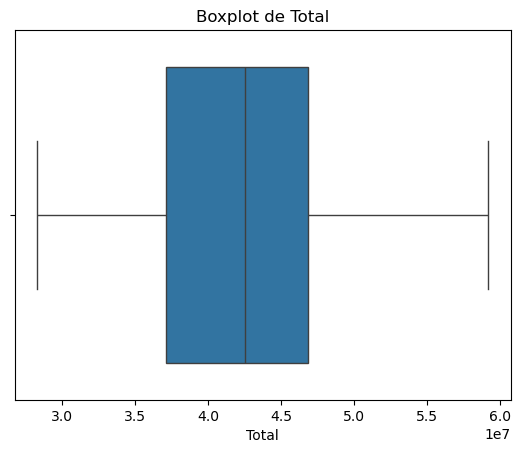

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'dataframe'
sns.boxplot(x=dataframe['Total'])
plt.title('Boxplot de Total')
plt.show()

In [17]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Guardar el DataFrame como archivo CSV
dataframe.to_csv('Consumo_Energia_Electrica_v1.csv', index=False)

# ME DA ERROR AL GUARDAR ALGUNOS DATOS, MESES NO GUARDA CON NUM , ALGUNOS EN LETRAS. SEGUIR LIMPIANDO EL DATASET